### Titanic with EDA

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

sns.set_theme(style='darkgrid', palette='deep', font='NanumGothic')

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
df_train = pd.read_csv(rf'C:\Users\perso\.cache\kagglehub\datasets\mustafahakan\titanic-traintest-data\versions\1\train.csv')
df_test = pd.read_csv(rf'C:\Users\perso\.cache\kagglehub\datasets\mustafahakan\titanic-traintest-data\versions\1\test.csv')

#### 데이터 확인

In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
## Nan값을 확인
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Initial          0
dtype: int64

##### 생존률
- 그래프를 통해 생존 비율을 확인

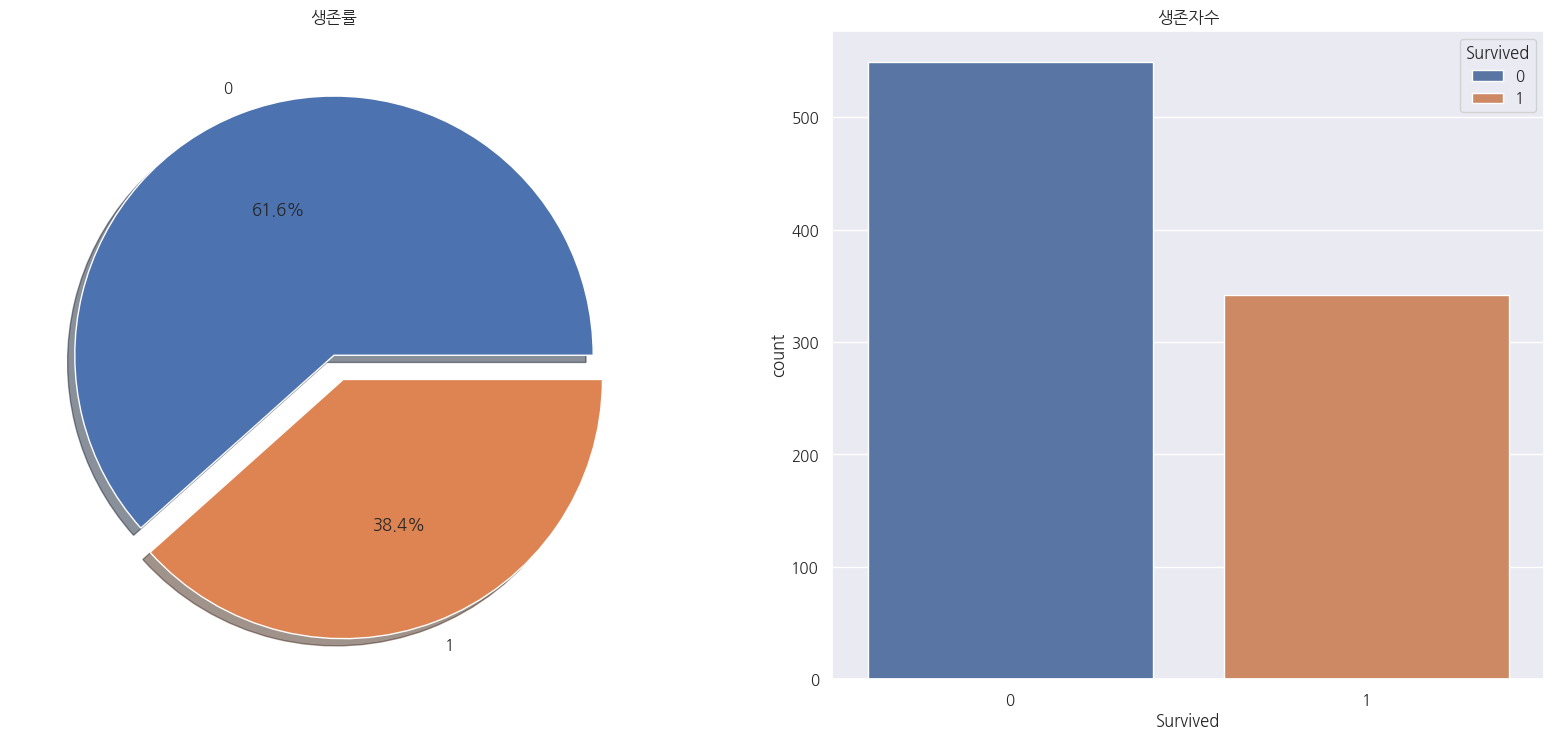

In [19]:
f, ax = plt.subplots(1, 2, figsize=(18,8))
df_train['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('생존률')
ax[0].set_ylabel('')
sns.countplot(df_train, x='Survived', hue='Survived', ax=ax[1])
ax[1].set_title('생존자수')
plt.show()

- 살아남은 승객의 비율이 사망한 승객보다 작음을 알 수 있음(생존자는 전체 891명 중 342명)
- dataset의 생존여부 승객의 data를 각 feature마다 관찰할 것

#### feature
1. Categorical data(범주형 자료)
    - 범주형 자료는 몇개의 범주 또는 항목의 형태로 나타나는 자료로 이 항목들간 순서의 여부에 따라 분류
        1. Ordinal data(순위형 자료) 
            - 순서가 있는 범주형 자료. ex) 1등급, 2등급, 3등급.
            - Titanic - Pclass
        2. Nominal data(명목형 자료)
            - 순서가 없는 범주형 자료. ex) 서울, 대전, 대구, 부산.
            - Titanic - Sex, Embarked
2. Numerical data(수치형 자료)
    - 수치로서 측정되는 자료. 이때, 성질에 따라 다음 두 type으로 분류
        1. Continuous data(연속형 자료)
            - 값이 연속적인 자료. ex) 키, 몸무게.
            - Titanic - Age, Fare
        2. Discrete data(이산형 자료)
            - 셀 수 있는 자료. ex) 불량품 수.
            - Titanic - SibSp, Parch

##### 성별에 따른 생존률

- groupby로 Sex,Survived column에서 Survived를 집계

In [87]:
df_train.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

- 성별에 따른 Survived 비율과 각 성별 Survived 여부를 확인

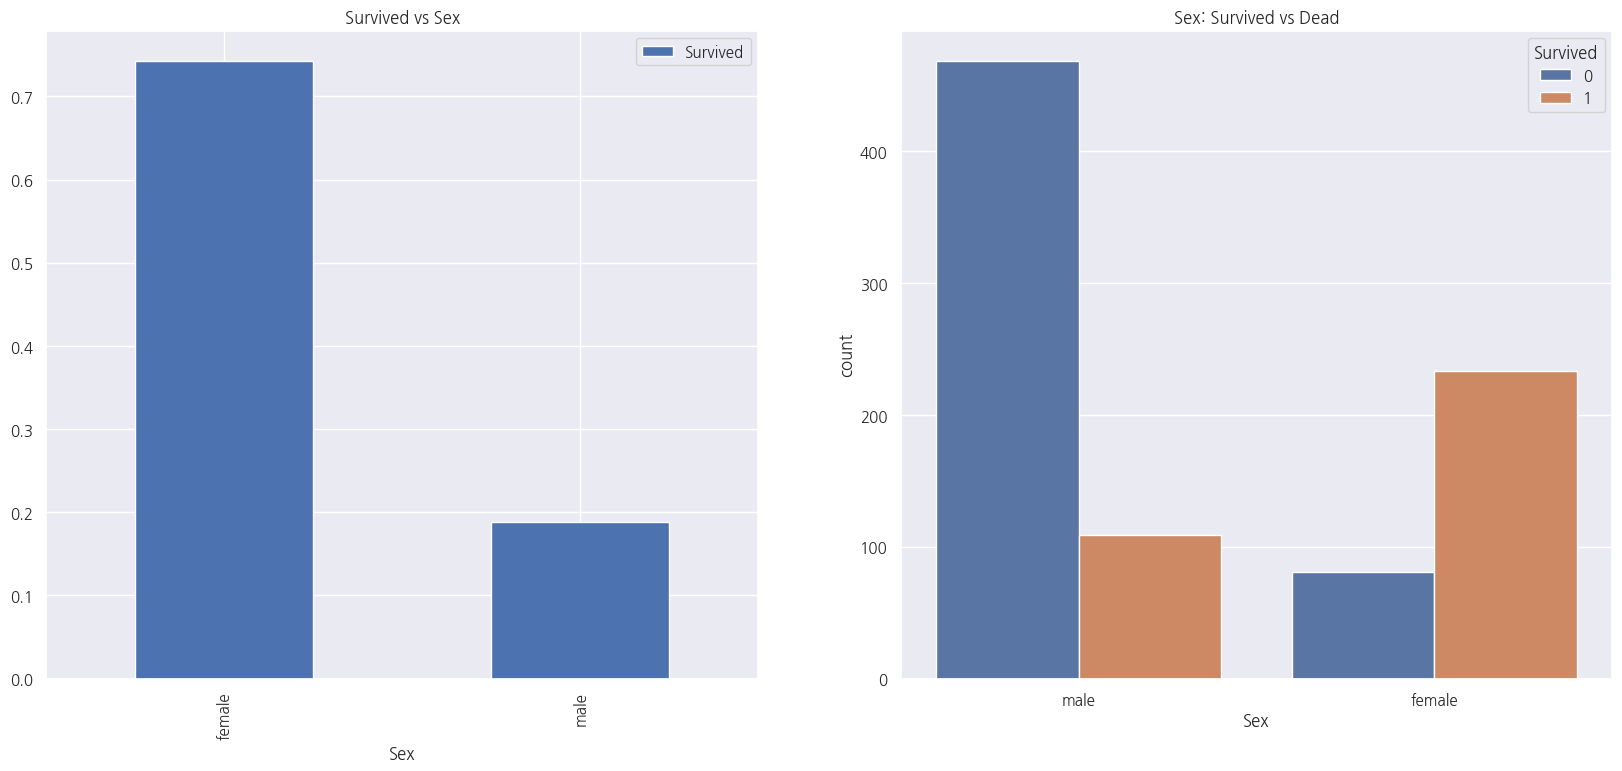

In [22]:
f, ax=plt.subplots(1, 2, figsize=(18,8))
df_train[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot(df_train, x='Sex', hue='Survived', ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

- 탑승 전체 비율은 남자가 많지만, 생존자에 여자가 남자의 2배 이상 생존함을 파악
- female중 생존 비율은 약 233/(81+233)=74%
- male중 생존 비율은 약 109/(468+109)=19%

##### PClass

In [23]:
pd.crosstab(df_train.Pclass, df_train.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


- 값이 클수록 색이 진함
    - Pclass 1의 Survived 1과 Pclass 3의 Survived 0의 값이 큼

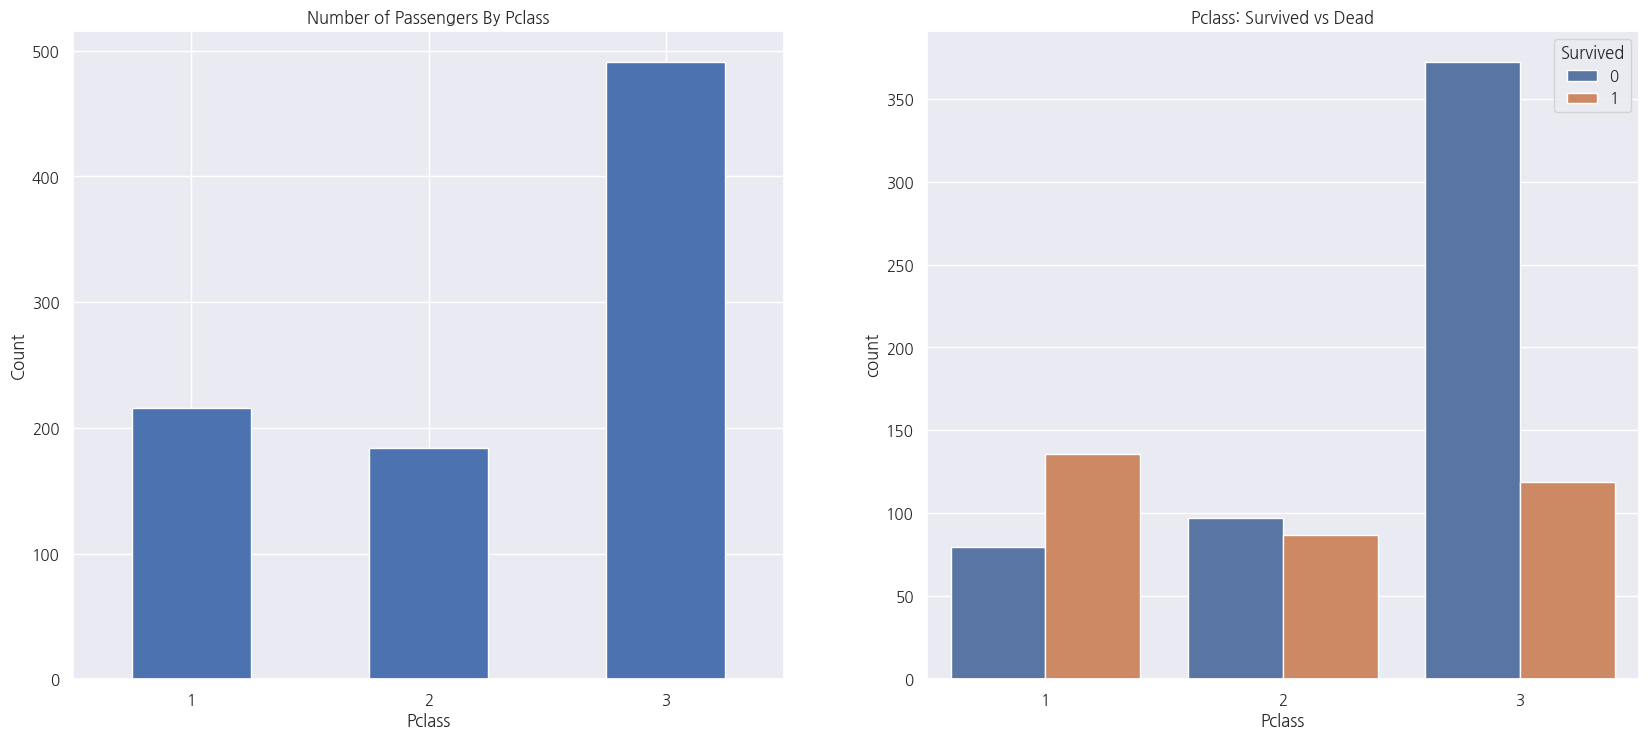

In [24]:
f, ax=plt.subplots(1, 2, figsize=(18,8))
df_train[['Pclass']].value_counts().sort_index().plot.bar(ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass')
ax[0].set_ylabel('Count')
ax[0].set_xticklabels([1,2,3], rotation=0)
sns.countplot(df_train, x='Pclass', hue='Survived', ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead')
plt.show()

- Pclass:1의 사람들이 높은 구조순위를 가짐
- Pclass:3의 사람들이 Pclass:1보다 훨씬 많이 탔음에도 Pclass:1의 사람들이 더 많이 생존.

In [25]:
df_train[['Pclass','Survived']].groupby('Pclass').mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


- Pclass:1의 사람들은 절반이 넘는 약 63%가 생존, Pclass:3의 사람들은 약 25%만 생존.

In [26]:
pd.crosstab([df_train.Pclass, df_train.Sex], df_train.Survived, margins=True).style.background_gradient(cmap='summer_r')

- Pclass:1, female 이 가장 많이 생존, Pclass:3, male 이 가장 많이 사먕

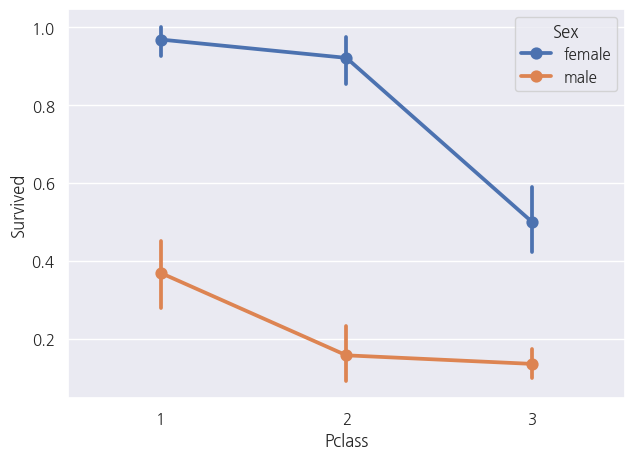

In [ ]:
## factorplot은 없어짐
sns.pointplot(df_train, x='Pclass', y='Survived', hue='Sex')
plt.show()

##### 나이

In [30]:
print('Oldest Passenger\'s age :', df_train['Age'].max())
print('Youngest Passenger\'s age :', df_train['Age'].min())
print('Average Age on the ship :', df_train['Age'].mean())

Oldest Passenger's age : 80.0
Youngest Passenger's age : 0.42
Average Age on the ship : 29.69911764705882


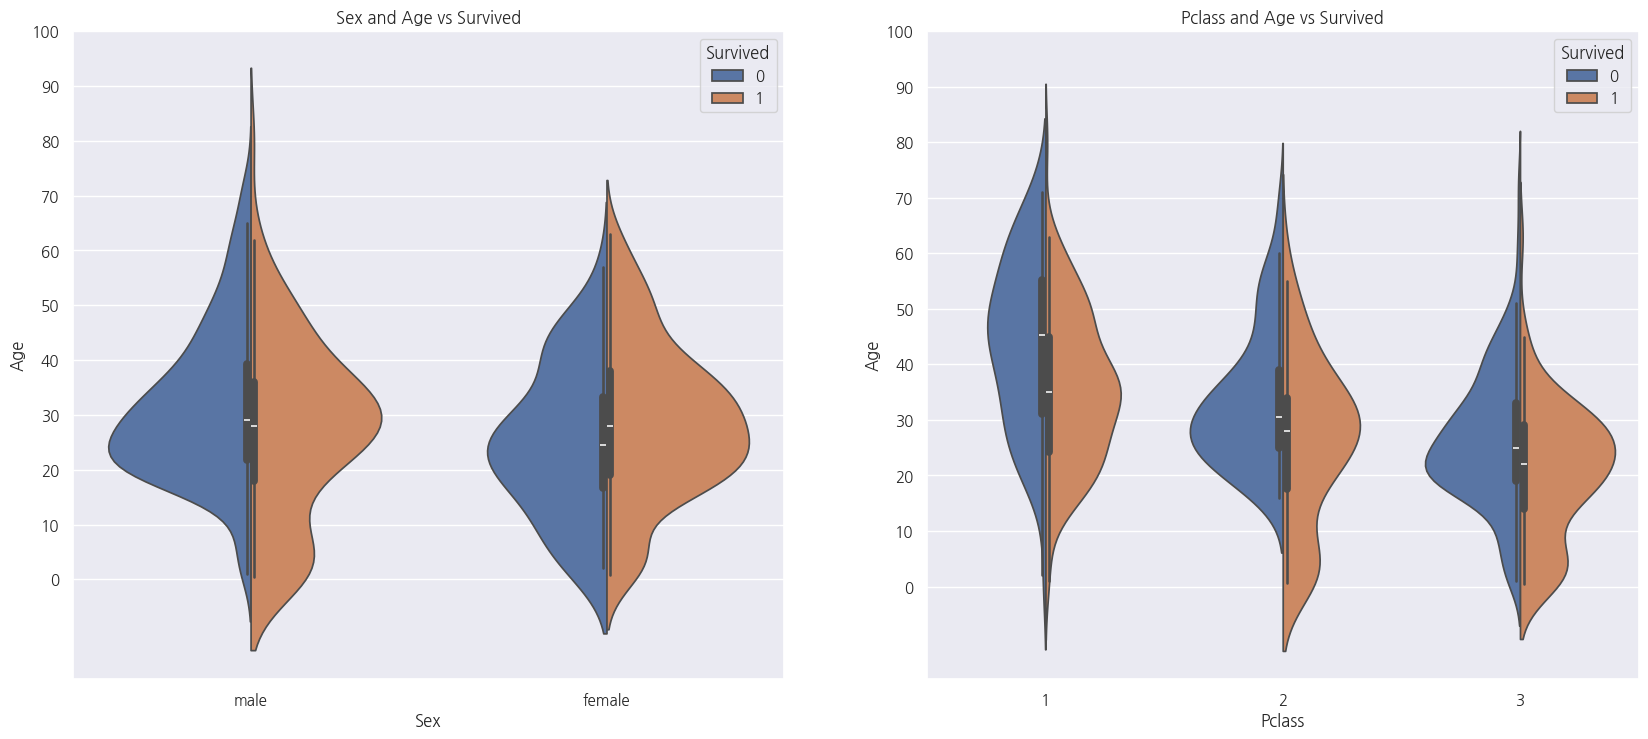

In [31]:
f, ax=plt.subplots(1, 2, figsize=(18,8))
sns.violinplot(df_train, x='Sex', y='Age', hue='Survived', split=True, ax=ax[0])
ax[0].set_title('Sex and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot(df_train, x='Pclass', y='Age', hue='Survived', split=True, ax=ax[1])
ax[1].set_title('Pclass and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

##### FillNan

In [32]:
df_train['Initial']=0
for i in df_train:
    df_train['Initial']=df_train.Name.str.extract('([A-Za-z]+)\.')
    
pd.crosstab(df_train.Sex, df_train.Initial).style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [33]:
df_train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)
df_train.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [34]:
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Master'),'Age']=5
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Miss'),'Age']=22
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mr'),'Age']=33
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mrs'),'Age']=36
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Other'),'Age']=46

df_train['Age'].isnull().any()

False

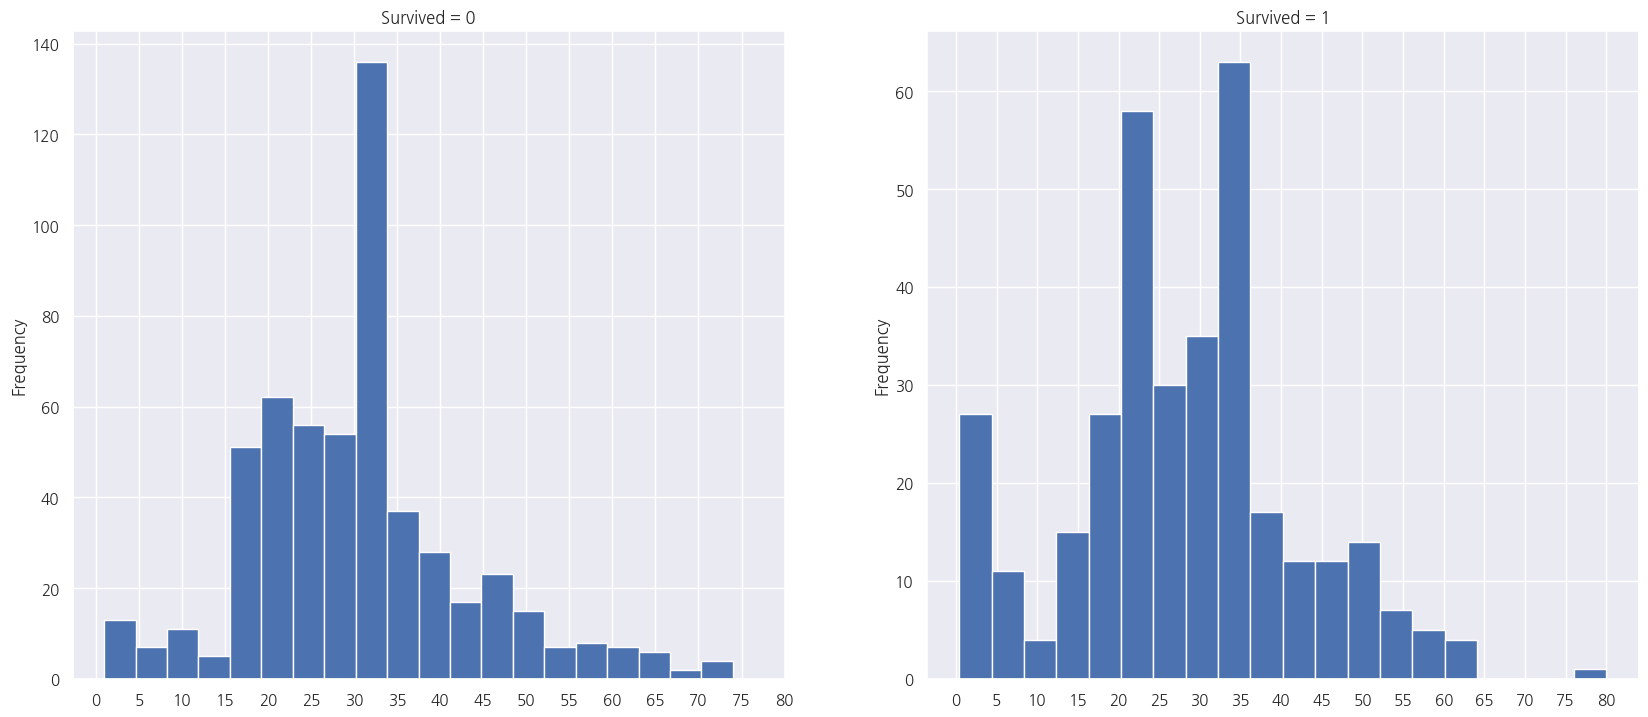

In [37]:
f, ax=plt.subplots(1, 2, figsize=(18, 8))
df_train[df_train['Survived']==0].Age.plot.hist(ax=ax[0], edgecolor='white', bins=20)
ax[0].set_title('Survived = 0')
x_range = list(range(0,85,5))
ax[0].set_xticks(x_range)
df_train[df_train['Survived']==1].Age.plot.hist(ax=ax[1], edgecolor='white', bins=20)
ax[1].set_title('Survived = 1')
ax[1].set_xticks(x_range)
plt.show()

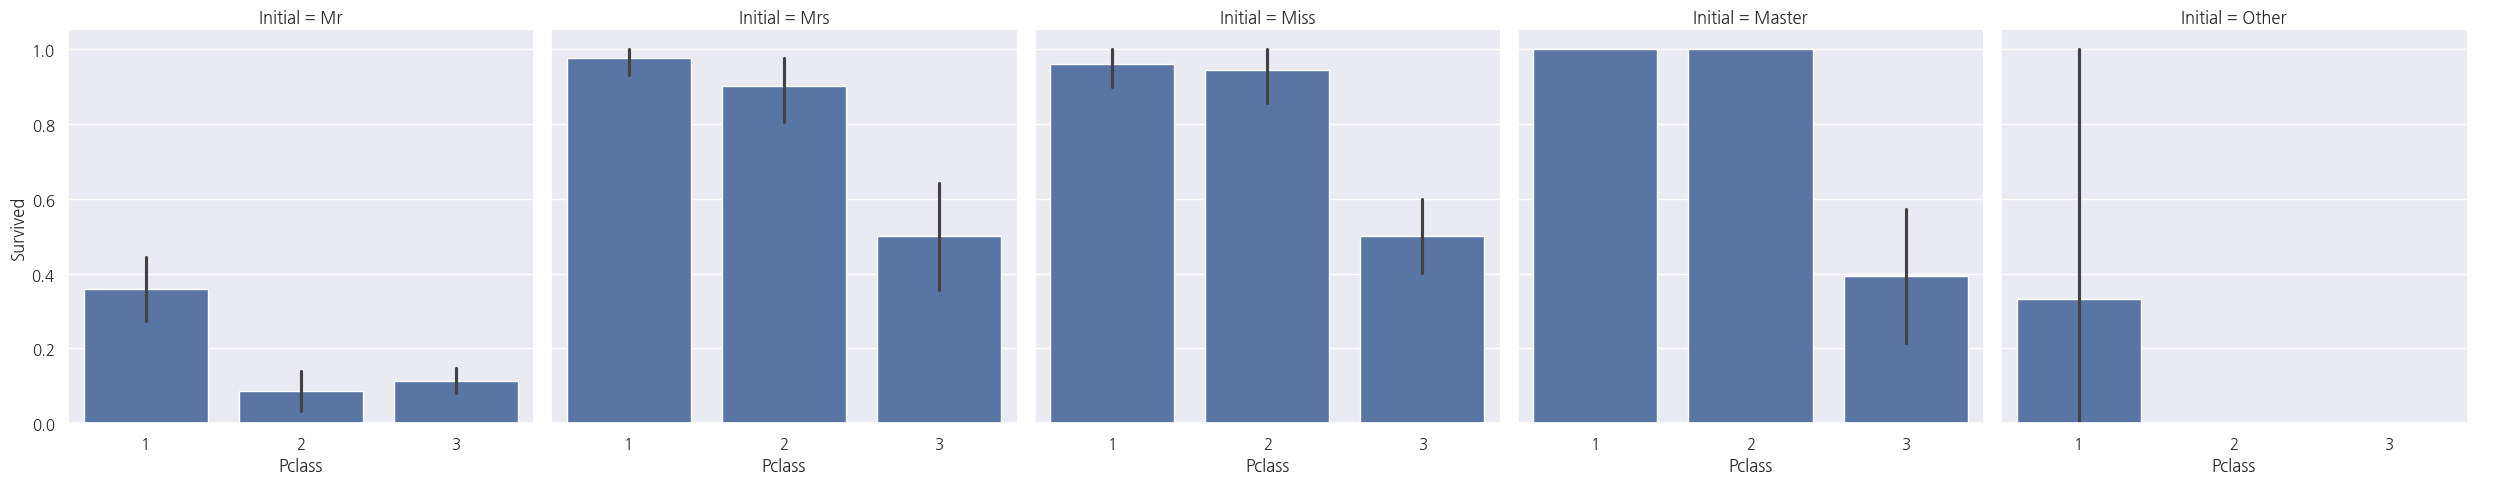

In [53]:
sns.catplot(df_train, x='Pclass', y='Survived', col='Initial', kind='bar')
plt.show()

##### 탑승항

In [54]:
pd.crosstab([df_train.Embarked, df_train.Pclass], [df_train.Sex, df_train.Survived], margins=True).style.background_gradient(cmap='summer_r')

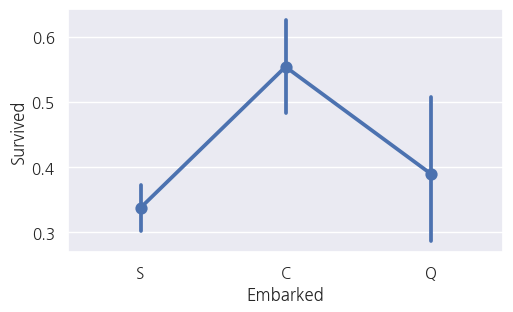

In [56]:
sns.pointplot(df_train, x='Embarked', y='Survived')
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

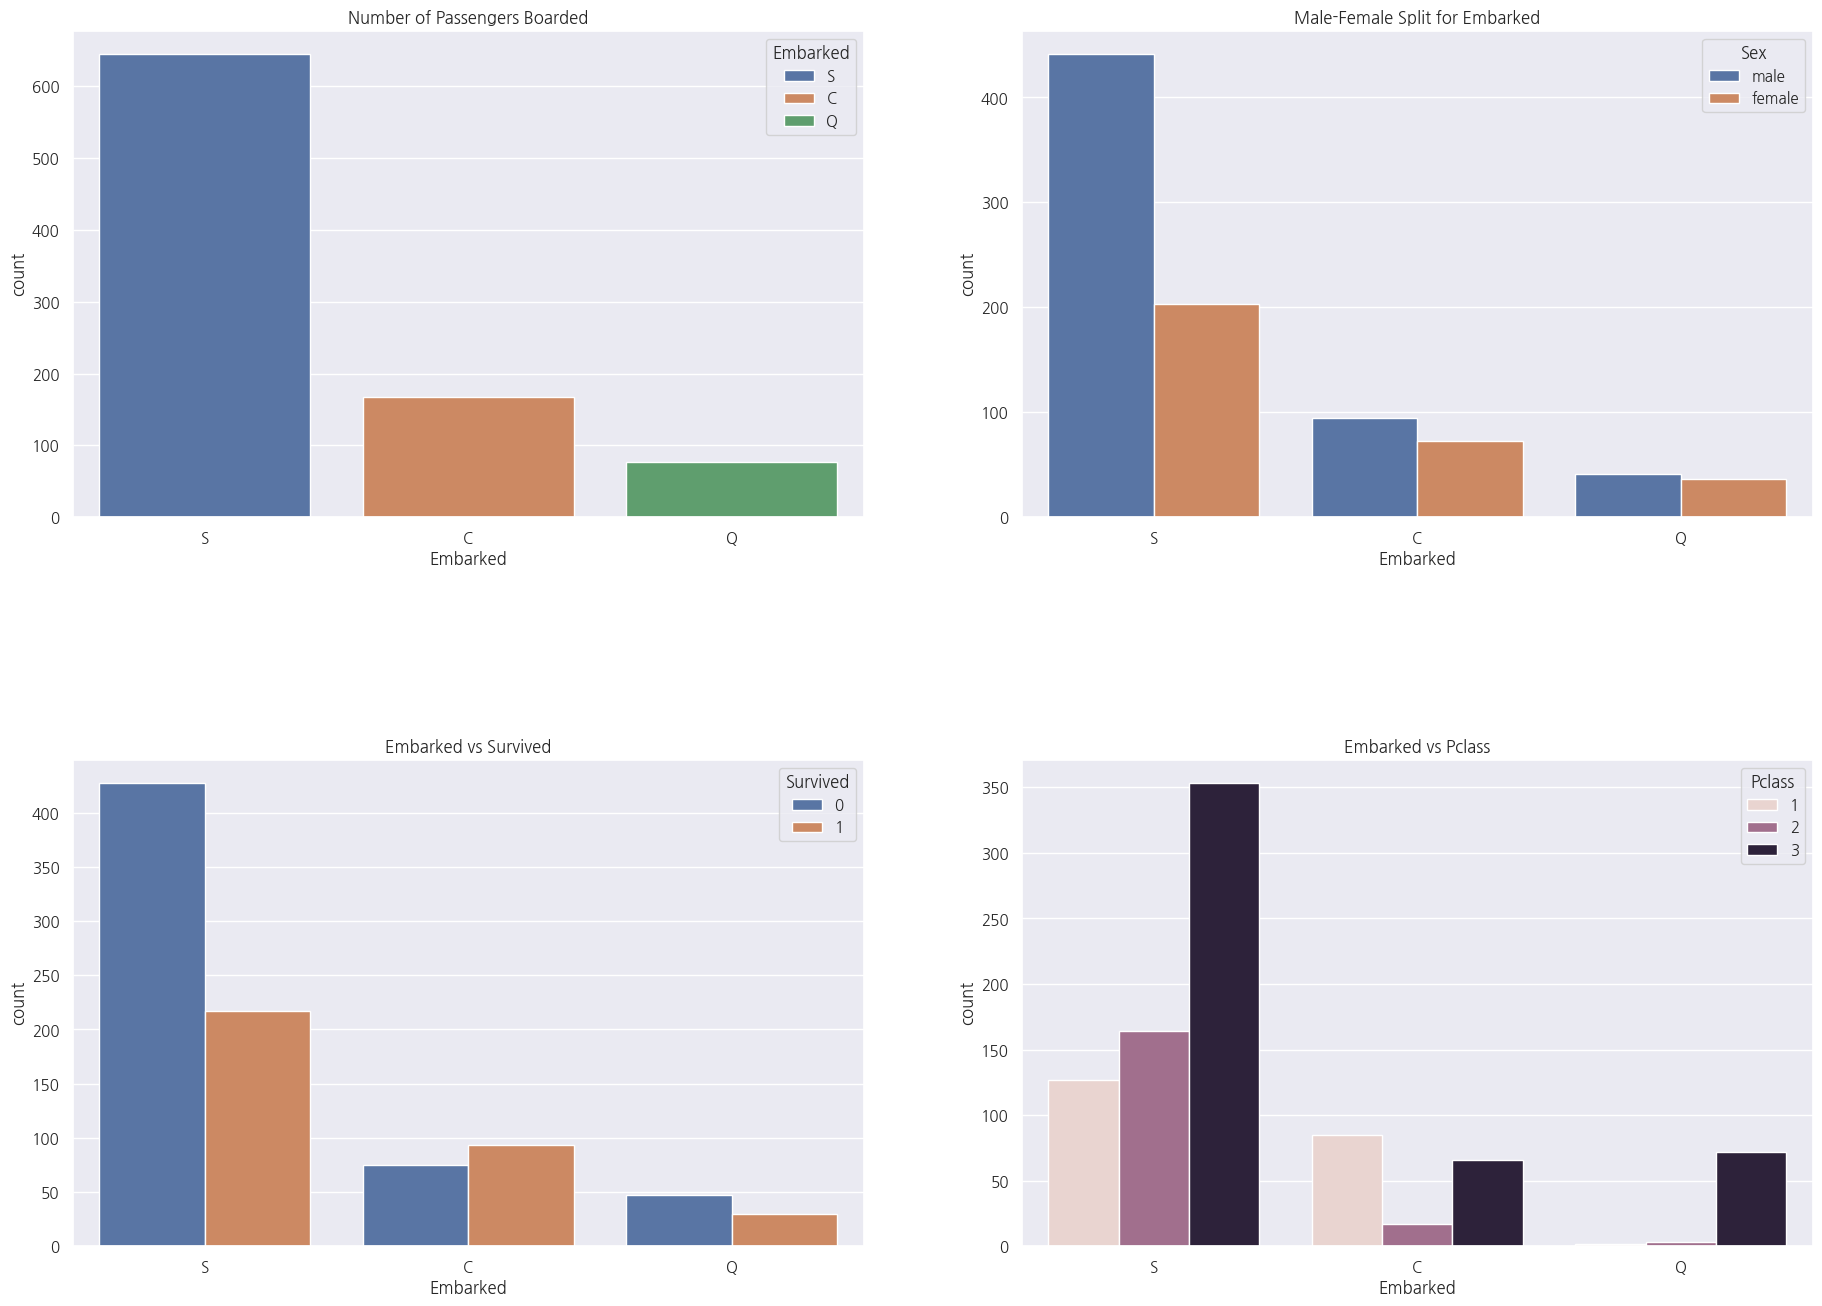

In [61]:
f, ax=plt.subplots(2, 2, figsize=(20,15))
sns.countplot(df_train, x='Embarked', hue='Embarked', ax=ax[0,0])
ax[0,0].set_title('Number of Passengers Boarded')
sns.countplot(df_train, x='Embarked', hue='Sex', ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot(df_train, x='Embarked', hue='Survived', ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot(df_train, x='Embarked', hue='Pclass', ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

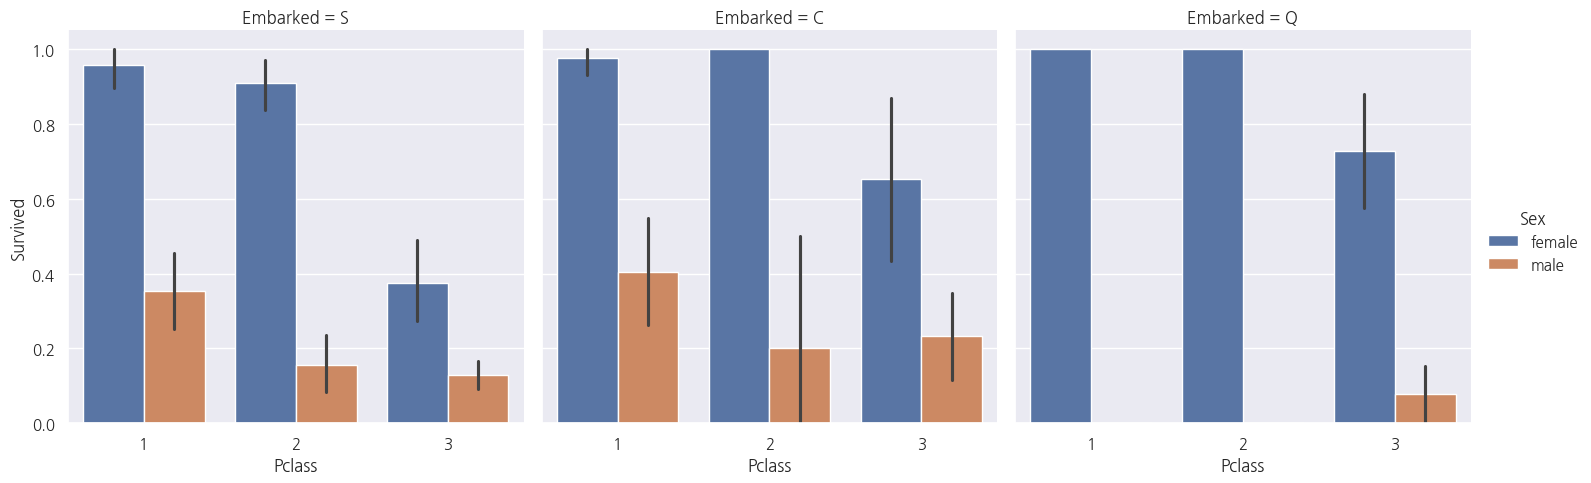

In [64]:
sns.catplot(df_train, x='Pclass', y='Survived', hue='Sex', col='Embarked', kind='bar')
plt.show()

In [65]:
df_train['Embarked'].fillna('S', inplace=True)
df_train['Embarked'].isnull().any()

False

##### 형제 배우자

In [66]:
pd.crosstab([df_train.SibSp], df_train.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


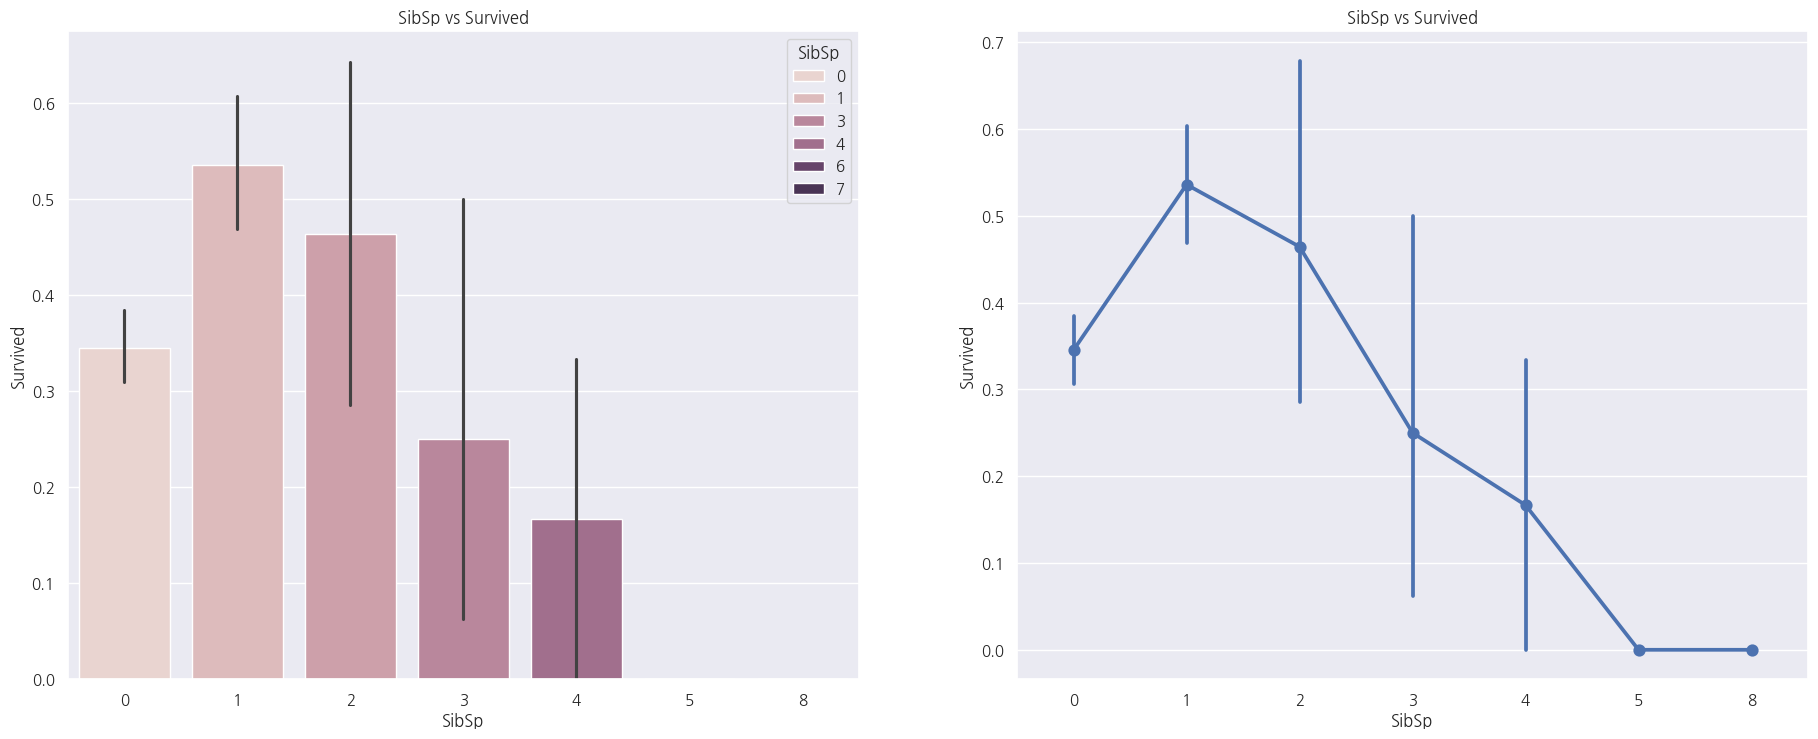

In [70]:
f, ax=plt.subplots(1, 2, figsize=(20,8))
sns.barplot(df_train, x='SibSp', y='Survived', hue='SibSp', ax=ax[0])
ax[0].set_title('SibSp vs Survived')
sns.pointplot(df_train, x='SibSp', y='Survived', ax=ax[1])
ax[1].set_title('SibSp vs Survived')
plt.show()

In [71]:
pd.crosstab(df_train.SibSp, df_train.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


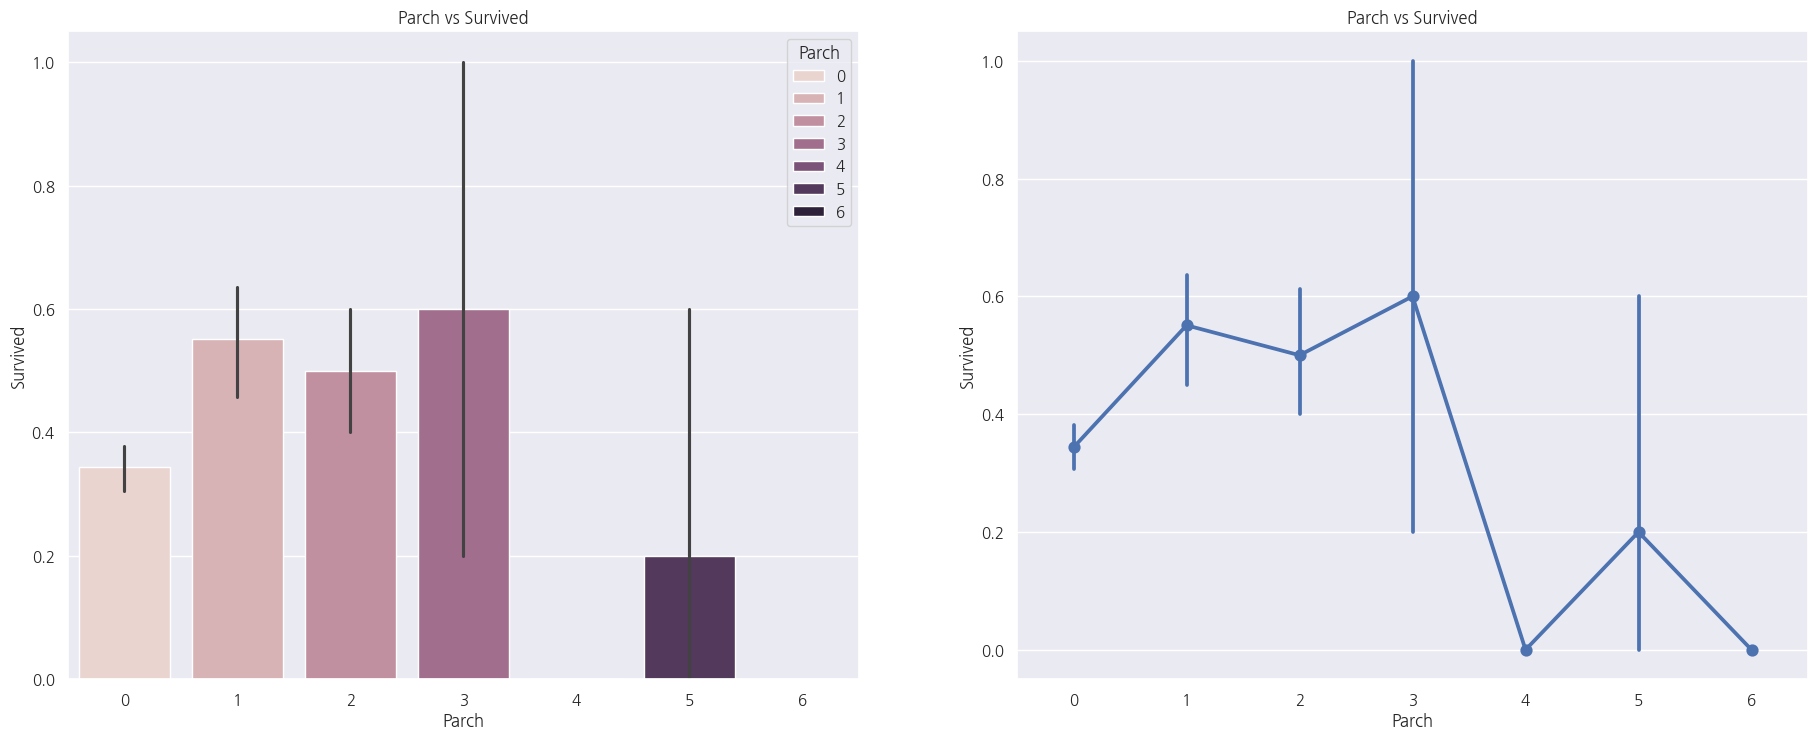

In [74]:
f, ax=plt.subplots(1, 2, figsize=(20, 8))
sns.barplot(df_train, x='Parch', y='Survived', hue='Parch', ax=ax[0])
ax[0].set_title('Parch vs Survived')
sns.pointplot(df_train, x='Parch', y='Survived', ax=ax[1])
ax[1].set_title('Parch vs Survived')
plt.show()

##### 비용

In [75]:
print('Highest Fare was :',df_train['Fare'].max())
print('Lowest Fare was :',df_train['Fare'].min())
print('Average Fare was :', df_train['Fare'].mean())

Highest Fare was : 512.3292
Lowest Fare was : 0.0
Average Fare was : 32.204207968574636


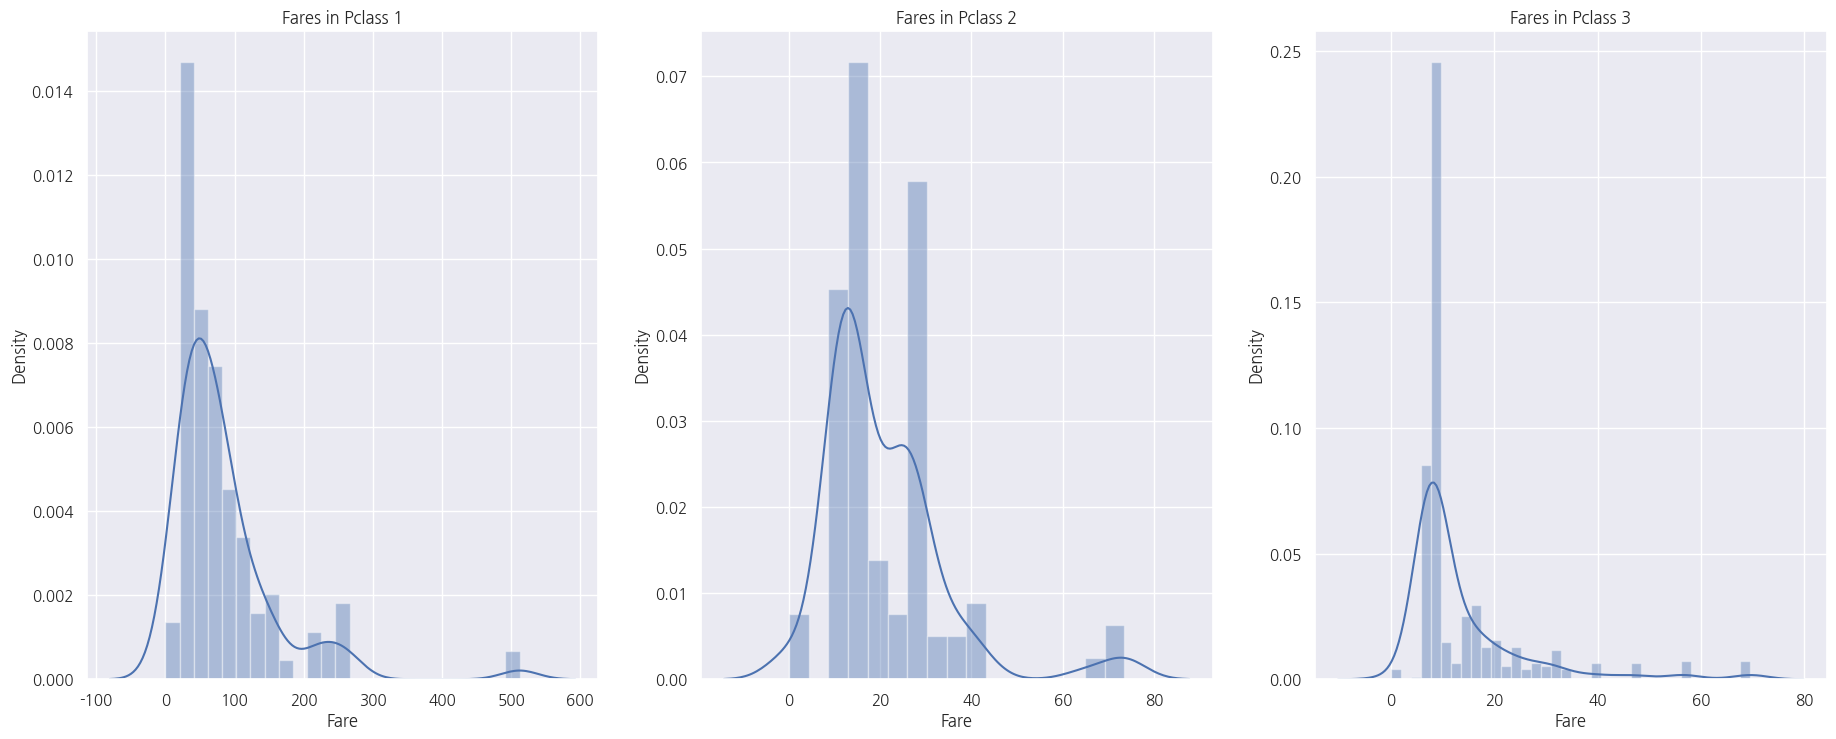

In [76]:
f, ax=plt.subplots(1, 3, figsize=(20, 8))
sns.distplot(df_train[df_train['Pclass']==1].Fare, ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(df_train[df_train['Pclass']==2].Fare, ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(df_train[df_train['Pclass']==3].Fare, ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

#### 특성간 상관관계

In [83]:
df_train_corr = df_train.drop(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Initial'], axis=1)

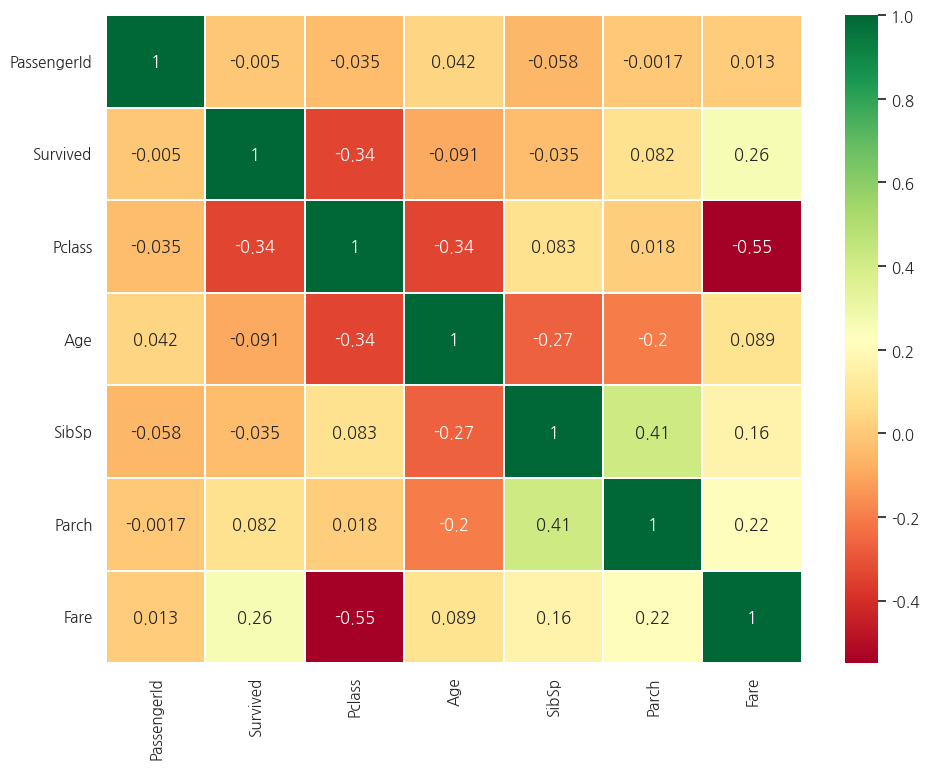

In [84]:
sns.heatmap(df_train_corr.corr(), annot=True, cmap='RdYlGn', linewidth=0.2)
fig=plt.gcf()
fig.set_size_inches(10, 8)
plt.show()

- https://velog.io/@hyungraelee/Titanic-with-EDA 계속